In [2]:
from __future__ import division, print_function, unicode_literals

import warnings
warnings.filterwarnings(action="ignore")

In [3]:
import pandas as pd

titanic = pd.read_csv("Titanic_data/train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
corr_matrix = titanic.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [6]:
titanic_num = titanic.select_dtypes(include=["int64", "float64"])

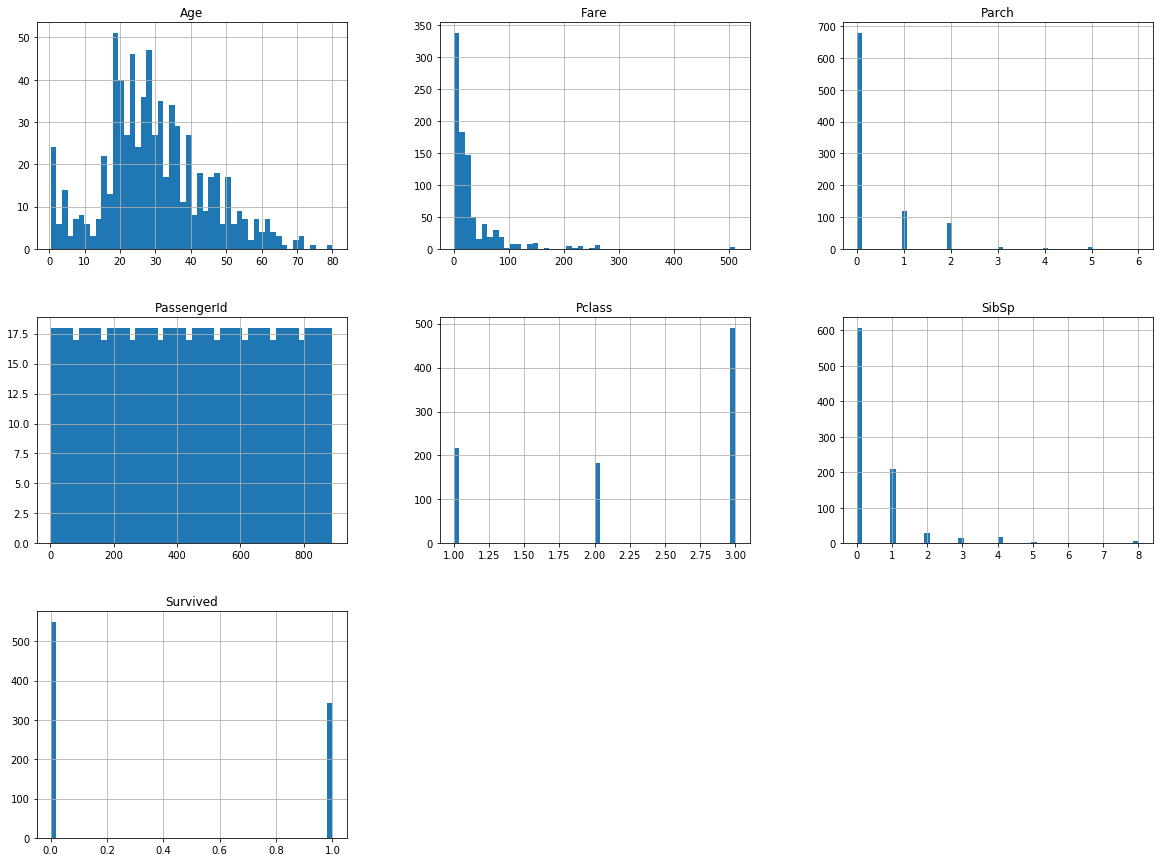

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

titanic_num.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0e920db00>,
      dtype=object)

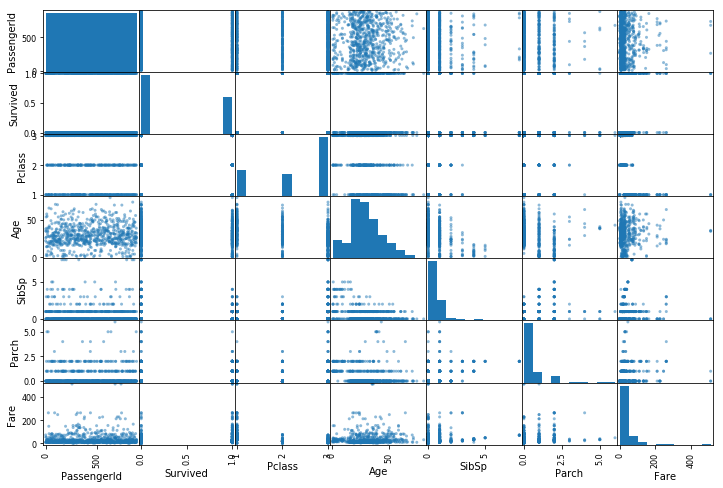

In [8]:
from pandas.plotting import scatter_matrix

scatter_matrix(titanic_num, figsize=(12, 8))

In [9]:
titanic = titanic[titanic["Embarked"].notnull()]
names = titanic["Name"]
tickets = titanic["Ticket"]
cabins = titanic["Cabin"]
y = titanic["Survived"]

titanic = titanic.drop(["Name", "Ticket", "Cabin", "Survived"], axis=1)
titanic_num = titanic.select_dtypes(include=["int64", "float64"])

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

num_pipeline = Pipeline([
    ("imputer", Imputer(strategy="median")),
    ("std_scaler", StandardScaler())
])

In [11]:
from future_encoders import OrdinalEncoder
from future_encoders import OneHotEncoder

cat_pipeline = Pipeline([
    ("ordinal", OrdinalEncoder()),
    ("one_hot", OneHotEncoder())
])

In [12]:
from future_encoders import ColumnTransformer

num_attribs = list(titanic_num)
cat_attribs = ["Sex", "Embarked"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [13]:
X = full_pipeline.fit_transform(titanic)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier()
forest_pred = cross_val_predict(forest_clf, X, y, cv=5)

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, forest_pred)

array([[503,  46],
       [143, 197]])

In [16]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y, forest_pred))
print(recall_score(y, forest_pred))

0.8106995884773662
0.5794117647058824


In [17]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X, y, cv=3, scoring="accuracy")
forest_scores

array([0.78787879, 0.75337838, 0.80405405])

In [18]:
from sklearn.svm import SVC

svc = SVC()
svc_scores = cross_val_score(svc, X, y, cv=3, scoring="accuracy")
svc_scores

array([0.81144781, 0.8277027 , 0.83108108])

In [19]:
svc_pred = cross_val_predict(svc, X, y, cv=3)
confusion_matrix(y, svc_pred)

array([[490,  59],
       [ 98, 242]])

In [20]:
print(precision_score(y, svc_pred))
print(recall_score(y, svc_pred))

0.8039867109634552
0.711764705882353


In [21]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [i for i in range(1, 101)],
    'max_features': [i for i in range(1, 8)],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(forest_clf, params, n_iter=100, scoring="accuracy")
random_search.fit(X, y)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'bootstrap': [True, False], 'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,

In [22]:
random_search.best_score_

0.8188976377952756

In [25]:
params = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1, 2, 3, 4, 5]
}
svc_search = RandomizedSearchCV(svc, params, n_iter=100, scoring="accuracy")
svc_search.fit(X, y)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1.0, 10.0], 'degree': [1, 2, 3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [ ]:
svc_search